# 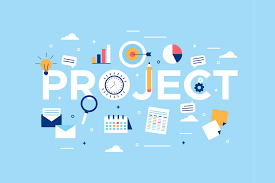

#Team 2

---


####Members:

---



---


* Harsha Vardhan
* Gangadhar Reddy
* Suresh Kanju
* Sagar Nagpal

##To Predict Impact

---


### Business Objective:

---



---


######To predict the impact of the incident raised by the customer.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Using "incident_event_log.csv"

In [ ]:
path = "/content/drive/MyDrive/incident_event_log.csv"
data = pd.read_csv(path)

In [ ]:
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [ ]:
data.shape

(141712, 36)

# Exploratory Data Analysis-(EDA)

In [ ]:
# Finding unknown values and replacing it with null values.
data.replace('?', np.nan, inplace=True)

In [ ]:
warnings.filterwarnings("ignore")

#### Considering only those columns which are having less than 50,000 null values and droping those which are having more than 40% of null values in single row.


In [ ]:
data=data[data.columns[data.isna().sum() < 50000]]

There are 29 features after eliminating the features which are having more than 50,000 null values.

---


40% * 29 == 11


In [ ]:
df = data[(data.isna().sum(axis=1) <11)]

In [ ]:
column_names = df.columns
column_names

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_updated_by', 'sys_updated_at', 'contact_type',
       'location', 'category', 'subcategory', 'u_symptom', 'impact', 'urgency',
       'priority', 'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'closed_code', 'resolved_by',
       'resolved_at', 'closed_at'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141712 entries, 0 to 141711
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141683 non-null  object
 8   opened_by                136877 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_updated_by           141712 non-null  object
 11  sys_updated_at           141712 non-null  object
 12  contact_type             141712 non-null  object
 13  location                 141636 non-null  object
 14  category            

### We can see in above info our data that are showing three types of data but as  you can see Boolean and Count also considered as a categorical.

In [ ]:
# Checking null values
df.isna().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                     29
opened_by                   4835
opened_at                      0
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32964
impact                         0
urgency                        0
priority                       0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
resolved_at                 3141
closed_at                      0
dtype: int64

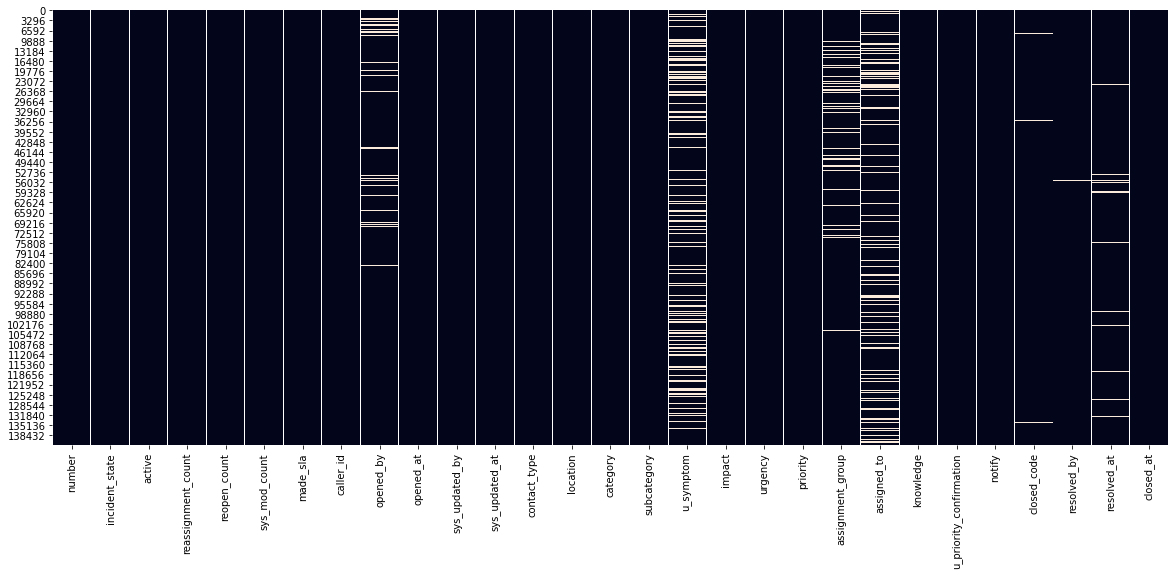

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(), cbar=False);
plt.show()

# Treatment of Null values

We are replacing null values with unique category which is not in column of given data.

In [ ]:
df['caller_id'].fillna(value='caller 5643',inplace=True)

In [ ]:
df['opened_by'].fillna(value = 'Opened by 539', inplace=True)

In [ ]:
df['location'].fillna('Location 250', inplace=True)

In [ ]:
df['category'].fillna('Category 64',inplace=True)

In [ ]:
df['subcategory'].fillna(value='Subcategory 306',inplace=True)

In [ ]:
df['u_symptom'].fillna(value='Symptom 610', inplace=True)

In [ ]:
df['assignment_group'].fillna(value='Group 83',inplace=True)

In [ ]:
df['assigned_to'].fillna(value='Resolver 254',inplace=True)

In [ ]:
df['resolved_by'].fillna(value='resolved by 232',inplace=True)

####Here we are replacing null values using "pad" method in fiil-na

In [ ]:
df['closed_code'].fillna(method='pad', inplace=True)

In [ ]:
df['closed_code'][data['closed_code'].isna()]

1520      code 11
1521      code 11
1522      code 11
1523      code 11
1524      code 11
           ...   
141699     code 6
141700     code 6
141701     code 6
141702     code 6
141703     code 6
Name: closed_code, Length: 714, dtype: object

Replacing unknown with null values and filling with mode.

In [ ]:
df.replace('-100', np.nan, inplace=True)

In [ ]:
df['incident_state'].fillna(df['incident_state'].mode()[0],inplace=True)

In [ ]:
df.isna().sum()

number                        0
incident_state                0
active                        0
reassignment_count            0
reopen_count                  0
sys_mod_count                 0
made_sla                      0
caller_id                     0
opened_by                     0
opened_at                     0
sys_updated_by                0
sys_updated_at                0
contact_type                  0
location                      0
category                      0
subcategory                   0
u_symptom                     0
impact                        0
urgency                       0
priority                      0
assignment_group              0
assigned_to                   0
knowledge                     0
u_priority_confirmation       0
notify                        0
closed_code                   0
resolved_by                   0
resolved_at                3141
closed_at                     0
dtype: int64

We are going to replace those null values which are in "resolved_at" column by adding mean of difference between "opened_at" and "resolved_at" in "openend_at" 

In [ ]:
# converting object type to datetime type for further process
df['opened_at'] = pd.to_datetime(df['opened_at'])
df['resolved_at'] = pd.to_datetime(df['resolved_at'])

In [ ]:
df_only = df[['opened_at', 'resolved_at']]
df_only

,opened_at,resolved_at
0,2016-02-29 01:16:00,2016-02-29 11:29:00
1,2016-02-29 01:16:00,2016-02-29 11:29:00
2,2016-02-29 01:16:00,2016-02-29 11:29:00
3,2016-02-29 01:16:00,2016-02-29 11:29:00
4,2016-02-29 04:40:00,2016-01-03 09:52:00
...,...,...
141707,2017-02-16 09:09:00,2017-02-16 09:53:00
141708,2017-02-16 14:17:00,2017-02-16 16:38:00
141709,2017-02-16 14:17:00,2017-02-16 16:38:00
141710,2017-02-16 14:17:00,2017-02-16 16:38:00


In [ ]:
df_n = df_only.dropna()
df_n

,opened_at,resolved_at
0,2016-02-29 01:16:00,2016-02-29 11:29:00
1,2016-02-29 01:16:00,2016-02-29 11:29:00
2,2016-02-29 01:16:00,2016-02-29 11:29:00
3,2016-02-29 01:16:00,2016-02-29 11:29:00
4,2016-02-29 04:40:00,2016-01-03 09:52:00
...,...,...
141707,2017-02-16 09:09:00,2017-02-16 09:53:00
141708,2017-02-16 14:17:00,2017-02-16 16:38:00
141709,2017-02-16 14:17:00,2017-02-16 16:38:00
141710,2017-02-16 14:17:00,2017-02-16 16:38:00


In [ ]:
df_n['new'] = df_n['resolved_at'] - df_n['opened_at']

In [ ]:
df_n

,opened_at,resolved_at,new
0,2016-02-29 01:16:00,2016-02-29 11:29:00,0 days 10:13:00
1,2016-02-29 01:16:00,2016-02-29 11:29:00,0 days 10:13:00
2,2016-02-29 01:16:00,2016-02-29 11:29:00,0 days 10:13:00
3,2016-02-29 01:16:00,2016-02-29 11:29:00,0 days 10:13:00
4,2016-02-29 04:40:00,2016-01-03 09:52:00,-57 days +05:12:00
...,...,...,...
141707,2017-02-16 09:09:00,2017-02-16 09:53:00,0 days 00:44:00
141708,2017-02-16 14:17:00,2017-02-16 16:38:00,0 days 02:21:00
141709,2017-02-16 14:17:00,2017-02-16 16:38:00,0 days 02:21:00
141710,2017-02-16 14:17:00,2017-02-16 16:38:00,0 days 02:21:00


In [ ]:
df_n['new'].mean()

Timedelta('5 days 00:40:40.813301475')

In [ ]:
import datetime

In [ ]:
#Adding mean into opened at column
df['N'] = df['opened_at'] + datetime.timedelta(days=5, hours = 0, minutes=40, seconds=40.813301475)

In [ ]:
df['resolved_at'].fillna(value = df['N'], inplace=True)

In [ ]:
df.drop('N',axis=1,inplace=True)

Droping some columns due to high colinearity

In [ ]:
df.drop('urgency', axis =1, inplace = True)

In [ ]:
df.drop('priority', axis =1, inplace = True)

In [ ]:
df['resolved_at'] = df['resolved_at'].astype('str')

In [ ]:
df['opened_at'] = df['opened_at'].astype('str')

In [ ]:
# describe the categorical columns
df.describe(include=['O'])

,number,incident_state,caller_id,opened_by,opened_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,impact,assignment_group,assigned_to,notify,closed_code,resolved_by,resolved_at,closed_at
count,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712,141712
unique,24918,8,5245,208,19849,846,50664,5,225,59,255,526,3,79,235,2,17,217,20015,2707
top,INC0019396,Active,Caller 1904,Opened by 17,2016-04-14 20:42:00,Updated by 908,24/3/2016 18:40,Phone,Location 204,Category 26,Subcategory 174,Symptom 491,2 - Medium,Group 70,Resolver 254,Do Not Notify,code 6,Resolved by 15,2016-03-06 16:29:00.000000,24/3/2016 18:59
freq,58,38721,1425,41466,58,36162,420,140462,31690,18453,35785,51985,134335,43474,27496,141593,86996,15421,93,3324


# Data visualization

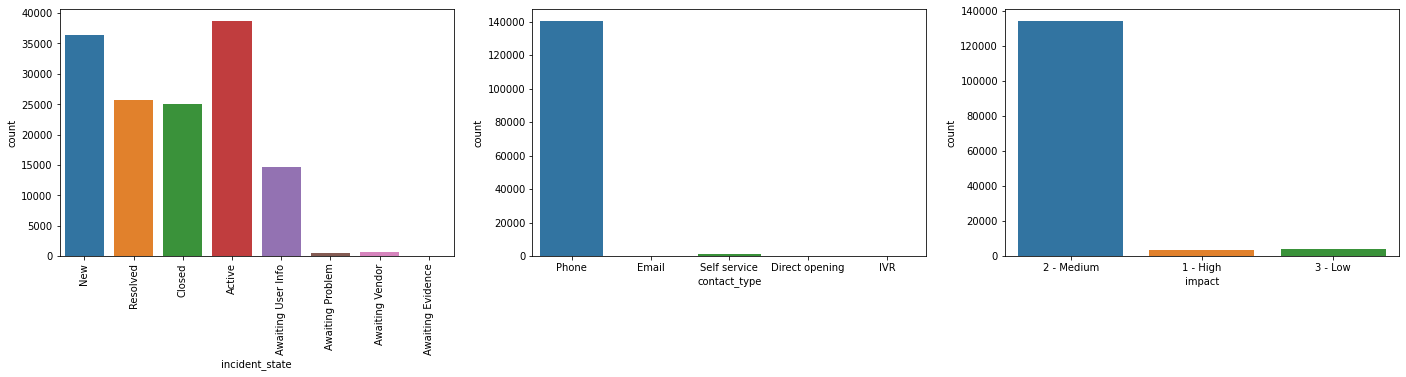

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(231);sns.countplot('incident_state',data=df);
plt.xticks(rotation = 90);
plt.subplot(232);sns.countplot('contact_type',data=df)
plt.subplot(233);sns.countplot('impact',data=df);

In [ ]:
ia=pd.crosstab(df.incident_state,df.active)
ia

active,False,True
incident_state,,
Active,0,38721
Awaiting Evidence,0,38
Awaiting Problem,0,461
Awaiting User Info,0,14642
Awaiting Vendor,0,707
Closed,24985,0
New,0,36407
Resolved,1,25750


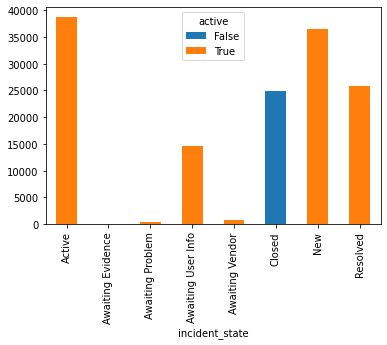

In [ ]:
ia.plot.bar(stacked=True)
plt.show()

In [ ]:
im=pd.crosstab(df.incident_state,df.made_sla)
im

made_sla,False,True
incident_state,,
Active,28,38693
Awaiting Evidence,0,38
Awaiting Problem,1,460
Awaiting User Info,20,14622
Awaiting Vendor,2,705
Closed,9154,15831
New,0,36407
Resolved,10,25741


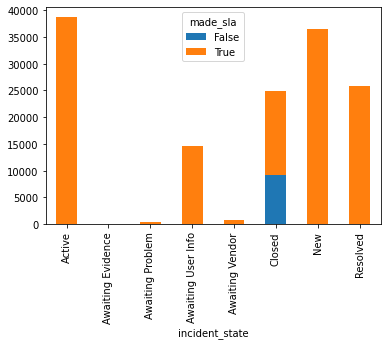

In [ ]:
im.plot.bar(stacked=True)
plt.show()

In [ ]:
ik=pd.crosstab(df.incident_state,df.knowledge)
ik

knowledge,False,True
incident_state,,
Active,30653,8068
Awaiting Evidence,35,3
Awaiting Problem,275,186
Awaiting User Info,11069,3573
Awaiting Vendor,657,50
Closed,21418,3567
New,30206,6201
Resolved,22036,3715


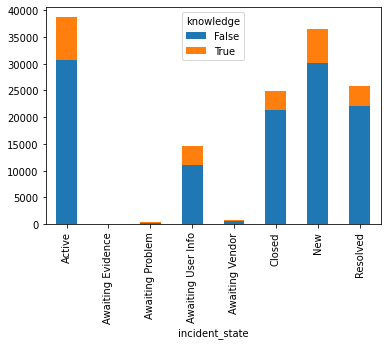

In [ ]:
ik.plot.bar(stacked=True)
plt.show()

In [ ]:
ii=pd.crosstab(df.incident_state,df.impact)
ii

impact,1 - High,2 - Medium,3 - Low
incident_state,,,
Active,960,36749,1012
Awaiting Evidence,4,32,2
Awaiting Problem,32,390,39
Awaiting User Info,235,13932,475
Awaiting Vendor,24,679,4
Closed,422,23809,754
New,1234,34320,853
Resolved,580,24424,747


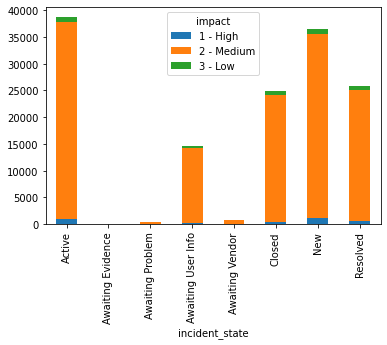

In [ ]:
ii.plot.bar(stacked=True)
plt.show()

In [ ]:
ai=pd.crosstab(df.active,df.impact)
ai

impact,1 - High,2 - Medium,3 - Low
active,,,
False,422,23810,754
True,3069,110525,3132


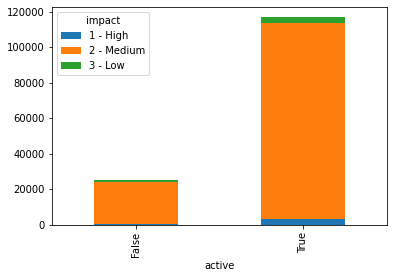

In [ ]:
ai.plot.bar(stacked=True)
plt.show()

In [ ]:
import ppscore as pps
pps.predictors(df,"impact") #We can calculate the PPS of all the predictors in the dataframe against a target y

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,number,impact,2.112581e-01,classification,True,weighted F1,0.920044,0.936935,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
1,resolved_at,impact,2.051733e-01,classification,True,weighted F1,0.920044,0.936449,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
2,opened_at,impact,1.895234e-01,classification,True,weighted F1,0.920044,0.935197,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
3,resolved_by,impact,9.983906e-02,classification,True,weighted F1,0.920044,0.928026,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
4,closed_at,impact,7.569195e-02,classification,True,weighted F1,0.920044,0.926096,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
5,sys_updated_by,impact,5.360893e-02,classification,True,weighted F1,0.920044,0.924330,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
6,opened_by,impact,5.260372e-02,classification,True,weighted F1,0.920044,0.924250,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
7,caller_id,impact,3.533860e-02,classification,True,weighted F1,0.920044,0.922869,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
8,assigned_to,impact,3.497895e-02,classification,True,weighted F1,0.920044,0.922840,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
9,assignment_group,impact,4.732871e-03,classification,True,weighted F1,0.920044,0.920422,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


# Encoding the Data

In [ ]:
#encoding the data using inbuilt coding
df['impact'].replace({'1 - High':1,'2 - Medium':2, '3 - Low':3},inplace=True)

In [ ]:
bool_c = df.select_dtypes(include = 'bool').columns

In [ ]:
for i in bool_c:
    df[bool_c] = df[bool_c].astype('int')

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder=preprocessing.LabelEncoder()

In [ ]:
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = label_encoder.fit_transform(df[column_name])
    else:
        pass

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141712 entries, 0 to 141711
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   number                   141712 non-null  int64
 1   incident_state           141712 non-null  int64
 2   active                   141712 non-null  int64
 3   reassignment_count       141712 non-null  int64
 4   reopen_count             141712 non-null  int64
 5   sys_mod_count            141712 non-null  int64
 6   made_sla                 141712 non-null  int64
 7   caller_id                141712 non-null  int64
 8   opened_by                141712 non-null  int64
 9   opened_at                141712 non-null  int64
 10  sys_updated_by           141712 non-null  int64
 11  sys_updated_at           141712 non-null  int64
 12  contact_type             141712 non-null  int64
 13  location                 141712 non-null  int64
 14  category                 141712 non-

In [ ]:
df['impact'].unique()

array([2, 1, 3])

In [ ]:
df1=df.copy()

In [ ]:
df.to_csv("incidents.csv")

## Converting data into X(features), and y(target column)

In [ ]:
X=df.drop('impact', axis = 1)

In [ ]:
y=df.iloc[:,17]

In [ ]:
X.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,0,6,1,0,0,0,1,1462,200,1435,104,33112,3,43,46,69,502,47,162,1,0,0,12,51,1262,2209
1,0,7,1,0,0,2,1,1462,200,1435,509,33150,3,43,46,69,502,47,162,1,0,0,12,51,1262,2209
2,0,7,1,0,0,3,1,1462,200,1435,658,33241,3,43,46,69,502,47,162,1,0,0,12,51,1262,2209
3,0,5,0,0,0,4,1,1462,200,1435,762,41838,3,43,46,69,502,47,162,1,0,0,12,51,1262,2209
4,1,6,1,0,0,0,1,1462,120,1436,605,33113,3,62,30,112,352,63,224,1,0,0,12,196,17,2317


In [ ]:
y

0         2
1         2
2         2
3         2
4         2
         ..
141707    2
141708    2
141709    2
141710    2
141711    2
Name: impact, Length: 141712, dtype: int64

In [ ]:
y.value_counts()

2    134335
3      3886
1      3491
Name: impact, dtype: int64

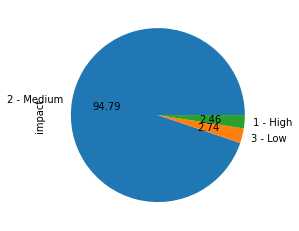

In [ ]:
#Pie chart
data.impact.value_counts().plot.pie(autopct = '%.2f')

###We split the data into train & test in the ratio of 90:10 and saving test data for final modelling



In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.10,random_state=20)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((127540, 26), (14172, 26), (127540,), (14172,))

In [ ]:
Counter(y_test)

Counter({1: 313, 2: 13448, 3: 411})

# Balancing the Data

In [ ]:
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.datasets import make_classification

Using SMOTETomek

In [ ]:
print('Original data set shape %s' % Counter(y_train))
smt = SMOTETomek(sampling_strategy='all',random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Original data set shape Counter({2: 120887, 3: 3475, 1: 3178})
Resampled dataset shape Counter({3: 120789, 1: 120775, 2: 120681})


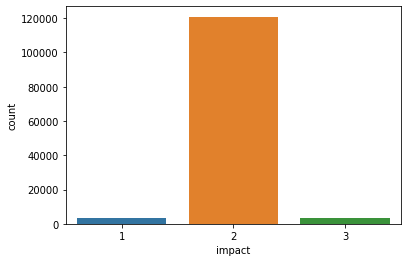

In [ ]:
sns.countplot(y_train)

In [ ]:
y_res = pd.DataFrame(y_res)

In [ ]:
y_res

,0
0,2
1,2
2,2
3,2
4,2
...,...
362240,3
362241,3
362242,3
362243,3


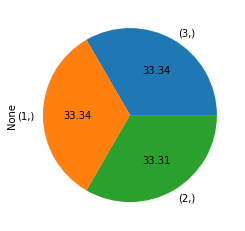

In [ ]:
#Pie chart
y_res.value_counts().plot.pie(autopct = '%.2f')

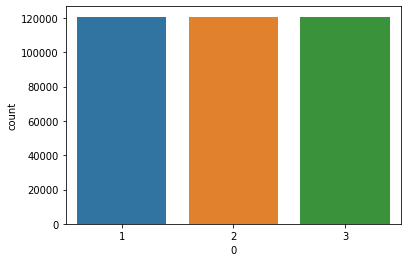

In [ ]:
sns.countplot(y_res.iloc[:,0])

#Feature Extraction using RFE method

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
model_rfe=LogisticRegression(max_iter=50)  # max_iter=100 by default
rfe=RFE(model_rfe)
fit=rfe.fit(X_res, y_res)
print(fit.support_)
print(fit.ranking_)

[ True False False False False  True False False  True False  True False
 False  True  True  True  True  True  True False False False False  True
  True  True]
[ 1  5 11  2 13  1  9  3  1  7  1  8 12  1  1  1  1  1  1 10  6 14  4  1
  1  1]


In [ ]:
Rank = pd.Series(fit.ranking_).sort_values()
Rank

0      1
23     1
18     1
17     1
16     1
15     1
14     1
13     1
24     1
10     1
25     1
8      1
5      1
3      2
7      3
22     4
1      5
20     6
9      7
11     8
6      9
19    10
2     11
12    12
4     13
21    14
dtype: int64

In [ ]:
ranking_c = pd.DataFrame({'Features': X.columns, 'Rank': fit.ranking_}).sort_values(by='Rank')

In [ ]:
ranking_c

,Features,Rank
0,number,1
23,resolved_by,1
18,assigned_to,1
17,assignment_group,1
16,u_symptom,1
15,subcategory,1
14,category,1
13,location,1
24,resolved_at,1
10,sys_updated_by,1


Try to find those columns which are having rank 1

In [ ]:
c1=ranking_c.loc[ranking_c['Rank'] <= 1]
c1

,Features,Rank
0,number,1
23,resolved_by,1
18,assigned_to,1
17,assignment_group,1
16,u_symptom,1
15,subcategory,1
14,category,1
13,location,1
24,resolved_at,1
10,sys_updated_by,1



## Here is our Selected features for further process

In [ ]:
selected_features = c1.values[:,0]
selected_features

array(['number', 'resolved_by', 'assigned_to', 'assignment_group',
       'u_symptom', 'subcategory', 'category', 'location', 'resolved_at',
       'sys_updated_by', 'closed_at', 'opened_by', 'sys_mod_count'],
      dtype=object)

In [ ]:
x_res = pd.DataFrame(X_res)

In [ ]:
x_res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,24448,7,1,0,0,5,1,3534,4,14894,306,20629,3,27,58,73,491,18,13,0,1,0,13,1,1169,2502
1,6824,0,1,0,0,2,1,4326,31,4544,727,24946,3,13,12,189,517,11,135,0,0,0,13,114,4101,1689
2,20989,6,1,1,0,3,1,2655,4,12031,108,11715,3,43,48,84,189,19,214,0,0,0,13,187,12086,1137
3,18725,0,1,0,0,0,1,2458,147,11645,685,43121,3,59,32,73,365,14,121,0,0,0,13,101,11380,156
4,4730,0,1,1,0,5,1,1008,60,2868,445,24951,3,104,25,249,247,77,43,0,0,0,16,28,5133,1867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362240,900,3,1,1,0,4,1,3294,93,1232,650,40000,3,43,38,211,491,38,67,1,0,0,13,48,18226,949
362241,20499,0,1,8,0,20,1,4909,14,19560,388,18336,3,11,44,73,365,16,27,0,0,0,12,15,12803,1376
362242,17994,6,0,0,0,0,1,2222,59,2218,740,36359,3,108,19,97,385,65,65,0,0,0,13,44,1866,2484
362243,19905,5,0,0,0,2,1,1979,86,18180,762,11779,3,87,17,73,491,56,53,0,1,0,13,37,18099,560


In [ ]:
x_res.columns = [X.columns]

In [ ]:
x_res

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,24448,7,1,0,0,5,1,3534,4,14894,306,20629,3,27,58,73,491,18,13,0,1,0,13,1,1169,2502
1,6824,0,1,0,0,2,1,4326,31,4544,727,24946,3,13,12,189,517,11,135,0,0,0,13,114,4101,1689
2,20989,6,1,1,0,3,1,2655,4,12031,108,11715,3,43,48,84,189,19,214,0,0,0,13,187,12086,1137
3,18725,0,1,0,0,0,1,2458,147,11645,685,43121,3,59,32,73,365,14,121,0,0,0,13,101,11380,156
4,4730,0,1,1,0,5,1,1008,60,2868,445,24951,3,104,25,249,247,77,43,0,0,0,16,28,5133,1867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362240,900,3,1,1,0,4,1,3294,93,1232,650,40000,3,43,38,211,491,38,67,1,0,0,13,48,18226,949
362241,20499,0,1,8,0,20,1,4909,14,19560,388,18336,3,11,44,73,365,16,27,0,0,0,12,15,12803,1376
362242,17994,6,0,0,0,0,1,2222,59,2218,740,36359,3,108,19,97,385,65,65,0,0,0,13,44,1866,2484
362243,19905,5,0,0,0,2,1,1979,86,18180,762,11779,3,87,17,73,491,56,53,0,1,0,13,37,18099,560


In [ ]:
# Selecting only selected features from all
x = x_res[selected_features]
x

,number,resolved_by,assigned_to,assignment_group,u_symptom,subcategory,category,location,resolved_at,sys_updated_by,closed_at,opened_by,sys_mod_count
0,24448,1,13,18,491,73,58,27,1169,306,2502,4,5
1,6824,114,135,11,517,189,12,13,4101,727,1689,31,2
2,20989,187,214,19,189,84,48,43,12086,108,1137,4,3
3,18725,101,121,14,365,73,32,59,11380,685,156,147,0
4,4730,28,43,77,247,249,25,104,5133,445,1867,60,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362240,900,48,67,38,491,211,38,43,18226,650,949,93,4
362241,20499,15,27,16,365,73,44,11,12803,388,1376,14,20
362242,17994,44,65,65,385,97,19,108,1866,740,2484,59,0
362243,19905,37,53,56,491,73,17,87,18099,762,560,86,2


#Modelling process

### Again we are spliting the train data into Train and Test into 80:20 ratio. So, that we can run final model on our test data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(x, y_res,test_size=0.20,random_state=20)

In [ ]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((289796, 13), (72449, 13), (289796, 1), (72449, 1))

# Logistic Regression

In [ ]:
model_LR=LogisticRegression()
model_LR.fit(X_train, y_train)
model_LR.score(X_val,y_val)

0.48820549628014187

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model_LR.predict(X_val)
confusion_matrix=confusion_matrix(y_val,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_val,y_pred)
print(classification_report)

[[12841  5974  5175]
 [ 8698  7317  8374]
 [ 3560  5298 15212]]
              precision    recall  f1-score   support

           1       0.51      0.54      0.52     23990
           2       0.39      0.30      0.34     24389
           3       0.53      0.63      0.58     24070

    accuracy                           0.49     72449
   macro avg       0.48      0.49      0.48     72449
weighted avg       0.48      0.49      0.48     72449



# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_ent = DecisionTreeClassifier()
model_ent.fit(X_train, y_train)
model_ent.score(X_val,y_val)

0.9814076108710955

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model_ent.predict(X_val)
confusion_matrix=confusion_matrix(y_val,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_val,y_pred)
print(classification_report)

[[23574   279   137]
 [  406 23786   197]
 [  133   195 23742]]
              precision    recall  f1-score   support

           1       0.98      0.98      0.98     23990
           2       0.98      0.98      0.98     24389
           3       0.99      0.99      0.99     24070

    accuracy                           0.98     72449
   macro avg       0.98      0.98      0.98     72449
weighted avg       0.98      0.98      0.98     72449



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# KNN

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
model_KNN.score(X_val,y_val)

0.9597924056922801

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model_KNN.predict(X_val)
confusion_matrix=confusion_matrix(y_val,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_val,y_pred)
print(classification_report)

[[23659   229   102]
 [ 1098 22189  1102]
 [  141   241 23688]]
              precision    recall  f1-score   support

           1       0.95      0.99      0.97     23990
           2       0.98      0.91      0.94     24389
           3       0.95      0.98      0.97     24070

    accuracy                           0.96     72449
   macro avg       0.96      0.96      0.96     72449
weighted avg       0.96      0.96      0.96     72449



# Random Forest Classifier

In [ ]:
model_RF=RandomForestClassifier(n_estimators=120, criterion='entropy', random_state=43)
model_RF.fit(X_train, y_train)
model_RF.score(X_val,y_val)

0.996783944567903

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model_RF.predict(X_val)
confusion_matrix=confusion_matrix(y_val,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_val,y_pred)
print(classification_report)

[[23925    55    10]
 [   57 24274    58]
 [   10    43 24017]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     23990
           2       1.00      1.00      1.00     24389
           3       1.00      1.00      1.00     24070

    accuracy                           1.00     72449
   macro avg       1.00      1.00      1.00     72449
weighted avg       1.00      1.00      1.00     72449



In [ ]:
X_test

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
150,21,5,0,1,0,8,1,1462,60,1454,762,43607,3,223,13,62,352,14,162,1,0,0,14,179,52,2323
13534,1938,7,1,2,0,6,1,3839,200,15741,578,12169,3,180,15,74,472,22,88,1,1,0,13,71,2470,1321
68414,10884,3,1,0,0,4,1,3530,31,15310,12,46749,3,13,24,73,365,63,206,0,0,0,13,179,16322,850
8080,1182,0,1,1,1,13,0,4336,14,1766,768,32469,3,185,35,47,362,0,42,1,1,0,9,27,11832,1122
73305,11765,0,1,0,0,7,1,124,184,17937,198,20991,3,43,58,73,365,19,214,0,0,0,13,187,1543,2582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82852,13567,3,1,0,0,7,1,3594,31,8190,556,29597,3,104,36,245,243,23,86,0,1,0,13,69,10231,1897
66219,10488,7,1,0,0,1,1,4429,31,11288,324,42340,3,59,9,73,365,63,32,0,1,0,13,11,11000,123
981,150,0,1,4,0,13,1,5031,184,1565,225,47288,3,113,15,74,487,16,162,1,0,0,14,147,17118,1316
75317,12138,5,0,1,0,4,1,4251,31,18748,53,16335,3,218,36,245,218,23,86,0,1,0,0,69,7384,799


In [ ]:
X_test = X_test[selected_features]
X_test

,number,resolved_by,assigned_to,assignment_group,u_symptom,subcategory,category,location,resolved_at,sys_updated_by,closed_at,opened_by,sys_mod_count
150,21,179,162,14,352,62,13,223,52,762,2323,60,8
13534,1938,71,88,22,472,74,15,180,2470,578,1321,200,6
68414,10884,179,206,63,365,73,24,13,16322,12,850,31,4
8080,1182,27,42,0,362,47,35,185,11832,768,1122,14,13
73305,11765,187,214,19,365,73,58,43,1543,198,2582,184,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82852,13567,69,86,23,243,245,36,104,10231,556,1897,31,7
66219,10488,11,32,63,365,73,9,59,11000,324,123,31,1
981,150,147,162,16,487,74,15,113,17118,225,1316,184,13
75317,12138,69,86,23,218,245,36,218,7384,53,799,31,4


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9706463449054473

In [ ]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
model_RF.score(X_test,y_test)

0.9887101326559413

##Adding pickle for our Deployment Process

In [ ]:
import pickle as p
p_out  = open("model.pkl", "wb")
p.dump(model_RF, p_out)
p_out.close()

In [ ]:
df4 = df[df.impact == 1]

In [ ]:
df4[selected_features]

,number,resolved_by,assigned_to,assignment_group,u_symptom,subcategory,category,location,resolved_at,sys_updated_by,closed_at,opened_by,sys_mod_count
25,4,179,162,63,121,66,44,218,1270,228,2213,34,1
26,4,179,162,14,121,66,44,218,1270,228,2213,34,2
27,4,179,162,14,121,66,44,218,1270,658,2213,34,3
28,4,179,162,14,121,66,44,218,1270,658,2213,34,4
29,4,179,162,14,121,66,44,218,1270,134,2213,34,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141636,24895,165,162,13,41,151,35,169,19990,355,510,52,4
141637,24895,165,162,13,41,151,35,169,19990,314,510,52,5
141638,24895,165,191,13,41,151,35,169,19990,89,510,52,6
141639,24895,165,191,13,41,151,35,169,19990,89,510,52,7


In [ ]:
df5 = df[df.impact == 3]

In [ ]:
df5[selected_features]

,number,resolved_by,assigned_to,assignment_group,u_symptom,subcategory,category,location,resolved_at,sys_updated_by,closed_at,opened_by,sys_mod_count
127,18,179,162,63,461,62,13,218,1272,155,2214,14,0
128,18,179,162,14,461,62,13,218,1272,609,2214,14,1
129,18,179,162,14,461,62,13,218,1272,335,2214,14,2
130,18,179,162,14,461,62,13,218,1272,134,2214,14,3
131,18,179,162,14,461,62,13,218,1272,762,2214,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141690,24911,216,162,63,410,0,41,148,19926,786,440,169,1
141691,24912,216,162,63,410,0,41,148,19927,762,507,169,0
141692,24912,216,162,63,410,0,41,148,19927,786,507,169,1
141696,24914,216,162,63,410,0,41,148,19928,762,509,169,0
